# <h1><center><u>Credit card defaulter classification</u></center></h1>

#### Business Case: Build a classifier model to predict the credit card defaulter for given dataset 

#### Task: Credit Card Defaulter Dataset 

## 1. Importing libraries and dataset

In [236]:
# importing the required libraries and the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
ds = pd.read_csv('credit_card_defaulter.csv')
ds

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236


In [326]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',100)

In [327]:
ds.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [328]:
#data types of each of the columns are showm below
ds.dtypes

Unnamed: 0      int64
default        object
student        object
balance       float64
income        float64
dtype: object

In [329]:
#Mean, variance, standard deviation, quantiles of the columns of datasets are described here
ds.describe(include='all')

,Unnamed: 0,default,student,balance,income
count,10000.00,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50,NaN,NaN,835.374886,33516.981876
...,...,...,...,...,...
min,1.00,NaN,NaN,0.000000,771.967729
25%,2500.75,NaN,NaN,481.731105,21340.462905
50%,5000.50,NaN,NaN,823.636973,34552.644800
75%,7500.25,NaN,NaN,1166.308387,43807.729275


In [330]:
ds.shape

(10000, 5)

## 2. Data Visualisation and augmentation

In [331]:
# Dropping the CarName value due to the error of the record
ds = ds.drop('Unnamed: 0',axis=1)

In [332]:
ds.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


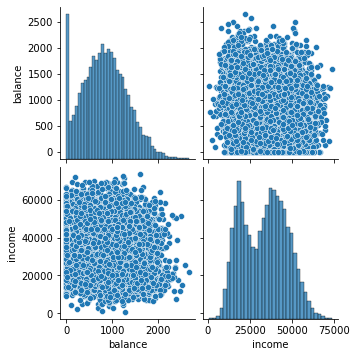

In [333]:
#Plotting a pairwise relationship in dataset
%matplotlib inline
sns.pairplot(ds)

<AxesSubplot:>

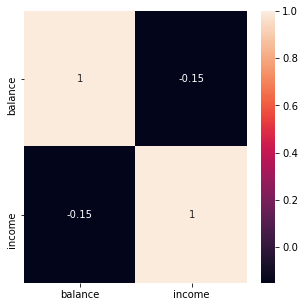

In [334]:
#heatmap representation of numerical columns in a dataset
fig,axes = plt.subplots(figsize = (5,5))
sns.heatmap(ds.corr(),annot=True)

In this heatmap plot shows that there is no correlation between income and balance

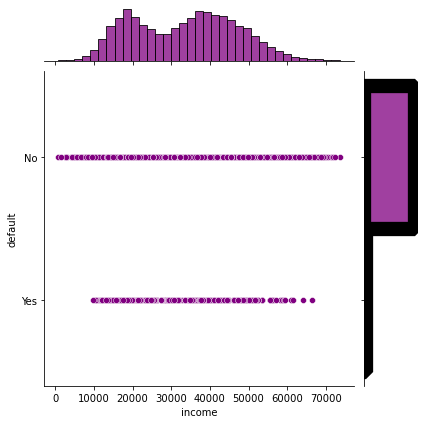

In [335]:
# Plotting a jointplot relationship in dataset
sns.jointplot(x='income',y='default',data=ds,color='purple')

<AxesSubplot:xlabel='default', ylabel='count'>

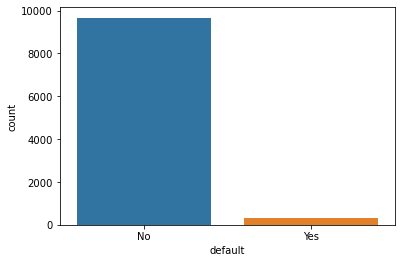

In [336]:
# Plotting a countplot to counting the dependent variable in dataset
sns.countplot(x='default',data=ds)

In this above countplot shows, the dataset contains more 'no' than 'yes',

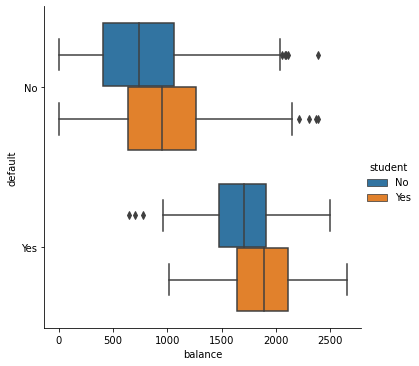

In [337]:
# Plotting a catplot to find outliers in dataset
sns.catplot(data=ds,y='default',x='balance',kind ='box',hue='student')

In the above plot shows some outlier points in the dataset (credit_card_defaulter).

### Perform missing values check 

In [338]:
#Checking for missing value in dataset
ds.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

There is no missing value, all columns have the correct type,and columns are named consistently.

### Prepare data to be able to build a classification model 

In [339]:
#Splitting data into regressor and response
x = ds.iloc[:,1:].values
y = ds.iloc[:,0].values

In [340]:
x

array([['No', 729.5264952, 44361.62507],
       ['Yes', 817.1804066, 12106.1347],
       ['No', 1073.549164, 31767.13895],
       ...,
       ['No', 845.4119892, 58636.15698],
       ['No', 1569.009053, 36669.11236],
       ['Yes', 200.9221826, 16862.95232]], dtype=object)

In [341]:
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [342]:
x[1]

array(['Yes', 817.1804066, 12106.1347], dtype=object)

### Encoding Categorical data

In [343]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)

In [344]:
print(x.shape)
print(y.shape)

(10000, 4)
(10000,)


In [345]:
x

array([[1.0, 0.0, 729.5264952, 44361.62507],
       [0.0, 1.0, 817.1804066, 12106.1347],
       [1.0, 0.0, 1073.549164, 31767.13895],
       ...,
       [1.0, 0.0, 845.4119892, 58636.15698],
       [1.0, 0.0, 1569.009053, 36669.11236],
       [0.0, 1.0, 200.9221826, 16862.95232]], dtype=object)

In [346]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [347]:
y

array([0, 0, 0, ..., 0, 0, 0])

### Training Test Split

In [348]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

### Shape of Train and test data

In [349]:
print('The shape of X_train is',x_train.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of X_test is',x_test.shape)
print('The shape of y_test is',y_test.shape)

The shape of X_train is (7000, 4)
The shape of y_train is (7000,)
The shape of X_test is (3000, 4)
The shape of y_test is (3000,)


In [350]:
x_train[1]

array([0.0, 1.0, 837.9118858, 20984.17906], dtype=object)

In [351]:
x_test[1]

array([1.0, 0.0, 814.6550424, 42520.09365], dtype=object)

In [352]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [353]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

### Scaling data

In [354]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,2:]=sc.fit_transform(x_train[:,2:])
x_test[:,2:]=sc.transform(x_test[:,2:])

In [355]:
x_train[1]

array([0.0, 1.0, 0.002110257495911296, -0.9442952949474442], dtype=object)

In [356]:
x_test[1]

array([1.0, 0.0, -0.045564100369017584, 0.6705430621383625], dtype=object)

In [357]:
y

array([0, 0, 0, ..., 0, 0, 0])

### 3. Random Forest Classifier Model Building
#### Build a random forest classification model
#### Train the model on the train dataset 
#### Print the model summary

In [358]:
from sklearn.ensemble import RandomForestClassifier

In [359]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [360]:
# Creating a RF classifier
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=7,n_jobs=-1)

In [361]:
# fiting function is used to train the model using the training sets as parametres
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=7)

In [362]:
#  Performing predictions on the test dataset
preds = model.predict(x_test)

### 4.XGBoost Classifier Model Building 
#### Build a XGBoost classification Model
#### Train the model on the Train Data Set 
#### Print the model summary


In [363]:
!pip install xgboost

^C


In [364]:
from xgboost import XGBClassifier

In [365]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: bool = False, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learning_rate : 

In [366]:
from sklearn.metrics import roc_auc_score

In [367]:
xgb =XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [368]:
#  Performing predictions on the test dataset
xgb_preds = model.predict(x_test)

### 5.Model Evaluation 

#### Random forest classifier

In [369]:
print('Roc_auc_score:',roc_auc_score(y_test,model.predict(x_test)))
print('Accuracy_score:', accuracy_score(y_test,model.predict(x_test)))

Roc_auc_score: 0.6224203778346095
Accuracy_score: 0.9696666666666667


In [370]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2909
           1       0.50      0.25      0.34        91

    accuracy                           0.97      3000
   macro avg       0.74      0.62      0.66      3000
weighted avg       0.96      0.97      0.96      3000



In [371]:
print('Precision: 50%')
print('recall: 25%')
print('f1-score: 34%')

Precision: 50%
recall: 25%
f1-score: 34%


In [372]:
print(confusion_matrix(y_test,preds))

[[2886   23]
 [  68   23]]


<AxesSubplot:>

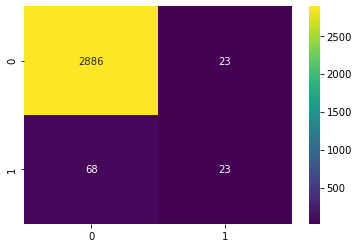

In [373]:
colormap = plt.cm.viridis
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True,cmap=colormap,fmt="g")

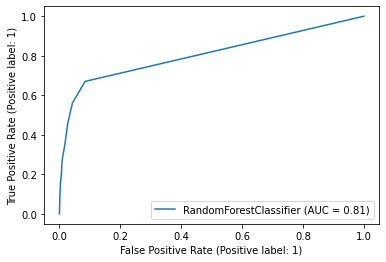

In [374]:
from sklearn import metrics
model.fit(x_train,y_train)
metrics.plot_roc_curve(model,x_test,y_test)
plt.show()

#### XGBoost Classifier

In [375]:
print('Roc_auc_score:',roc_auc_score(y_test,xgb.predict(x_test)))
print('Accuracy_score:',accuracy_score(y_test,xgb.predict(x_test)))

Roc_auc_score: 0.6435389979563234
Accuracy_score: 0.9693333333333334


In [376]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2909
           1       0.50      0.25      0.34        91

    accuracy                           0.97      3000
   macro avg       0.74      0.62      0.66      3000
weighted avg       0.96      0.97      0.96      3000



In [377]:
print('Precision: 50%')
print('recall: 25%')
print('f1-score: 34%')

Precision: 50%
recall: 25%
f1-score: 34%


In [378]:
print(confusion_matrix(y_test,xgb_preds))

[[2886   23]
 [  68   23]]


<AxesSubplot:>

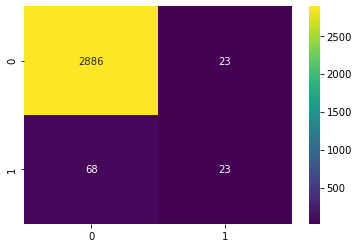

In [379]:
colormap = plt.cm.viridis
cm_xgb = confusion_matrix(y_test,xgb_preds)
sns.heatmap(cm_xgb,annot=True,cmap=colormap,fmt="g")

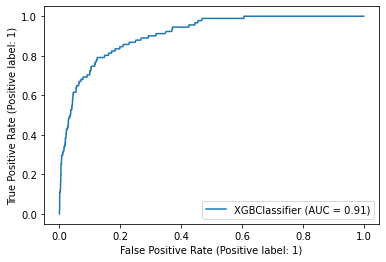

In [380]:
from sklearn import metrics
xgb.fit(x_train,y_train)
metrics.plot_roc_curve(xgb,x_test,y_test)
plt.show()

### 6.	Compare the performance of random forest classification and XGBoost classification models for given dataset 

##### In this analysis, used credit_card_defaulter dataset to compare various classification techniques namely the random forest and XGBoost at 70% training and 30% test size.

##### From credit_card_defaulter dataset we can see that 70% training size the both model is performed well with the ACCURACY 0.97 but, we consider the AUC(area under the curve) for random forest is 0.81 and XGBoost is 0.91.

##### So we can see that XG boost is well performed compare to Random Forest and also we know that in large dataset XGboost is performed well.
##### Hence, we can say that the XGBoost model is the BEST MODEL.

# <h1><center><u>Thank you..!!</u></center></h1>